In [ ]:
###LOGISTIC REGRESSION

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\framz\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1


In [4]:
import os

#Creating Dataset path
HRdataset_path = r"C:\Users\framz\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1"

# List files to check if dataset exists
print(os.listdir(HRdataset_path))  

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [16]:
import pandas as pd

HRdataset_path = r"C:\Users\framz\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1\WA_Fn-UseC_-HR-Employee-Attrition.csv"

HRdf = pd.read_csv(HRdataset_path)

#Show HR datarame header
HRdf.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
#Running Summary Statistics for HR dataframe
HRdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
#Data types of all variables
print(HRdf.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [34]:
#Convert categorical variables
# One-hot encode categorical columns
HRdf_encoded = pd.get_dummies(HRdf, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                                             'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

# Convert Attrition to binary
HRdf_encoded['Attrition'] = HRdf_encoded['Attrition'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
HRdf_encoded = HRdf_encoded.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])

# Verify data types (ensure all columns are numeric)
print(HRdf_encoded.dtypes)


Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCu

In [35]:
### Feature Importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define X (features) and y (target)
X = HRdf_encoded.drop(columns=['Attrition'])  
y = HRdf_encoded['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get feature importance (absolute values of coefficients)
feature_importance = np.abs(model.coef_[0])

# Create a DataFrame to sort and display top features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 5 important features
print("Top 5 Most Important Features:")
print(importance_df.head(5))


Top 5 Most Important Features:
                             Feature  Importance
43                      OverTime_Yes    0.911602
23  BusinessTravel_Travel_Frequently    0.675410
34     JobRole_Laboratory Technician    0.645498
19                    YearsAtCompany    0.592104
22              YearsWithCurrManager    0.547731


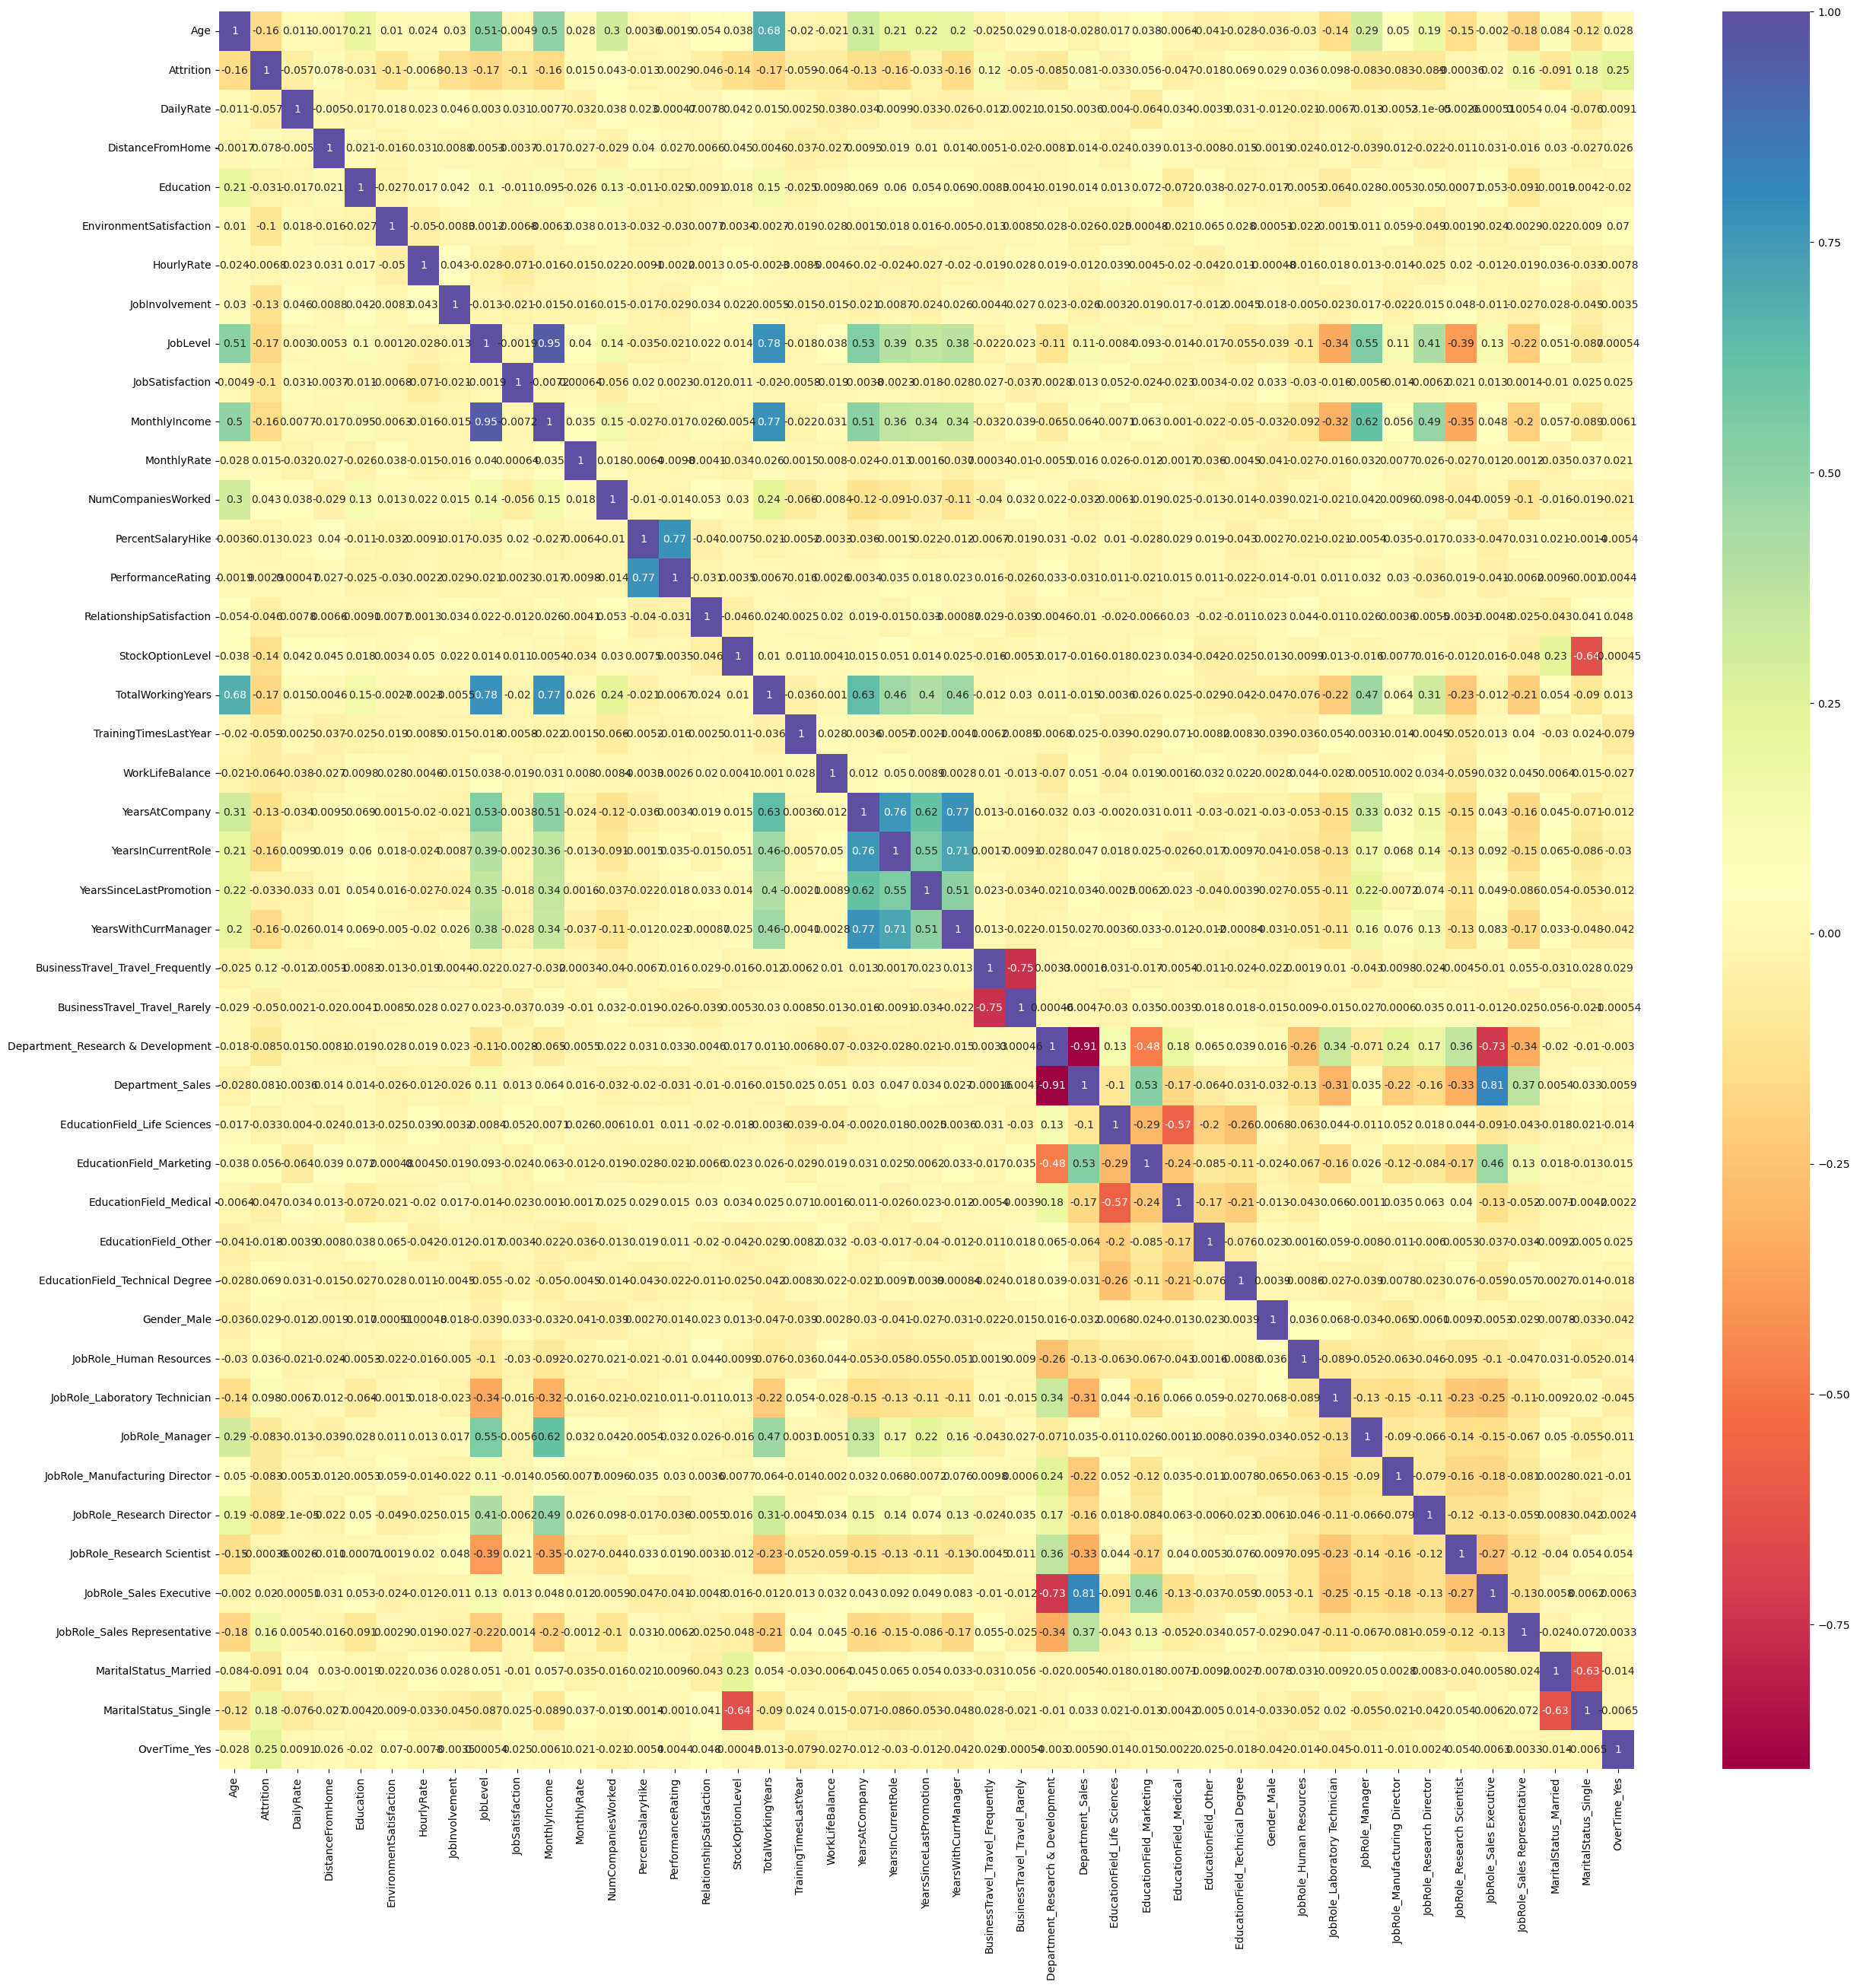

In [38]:
##Correlation Visualization 

#Compute the correlation matrix
HRcorrelation_matrix = HRdf_encoded.corr()

#Visualization of Correlations
fig = plt.figure(figsize=(30, 30))
sns.heatmap(HRcorrelation_matrix, annot=True, cmap="Spectral")
plt.show()

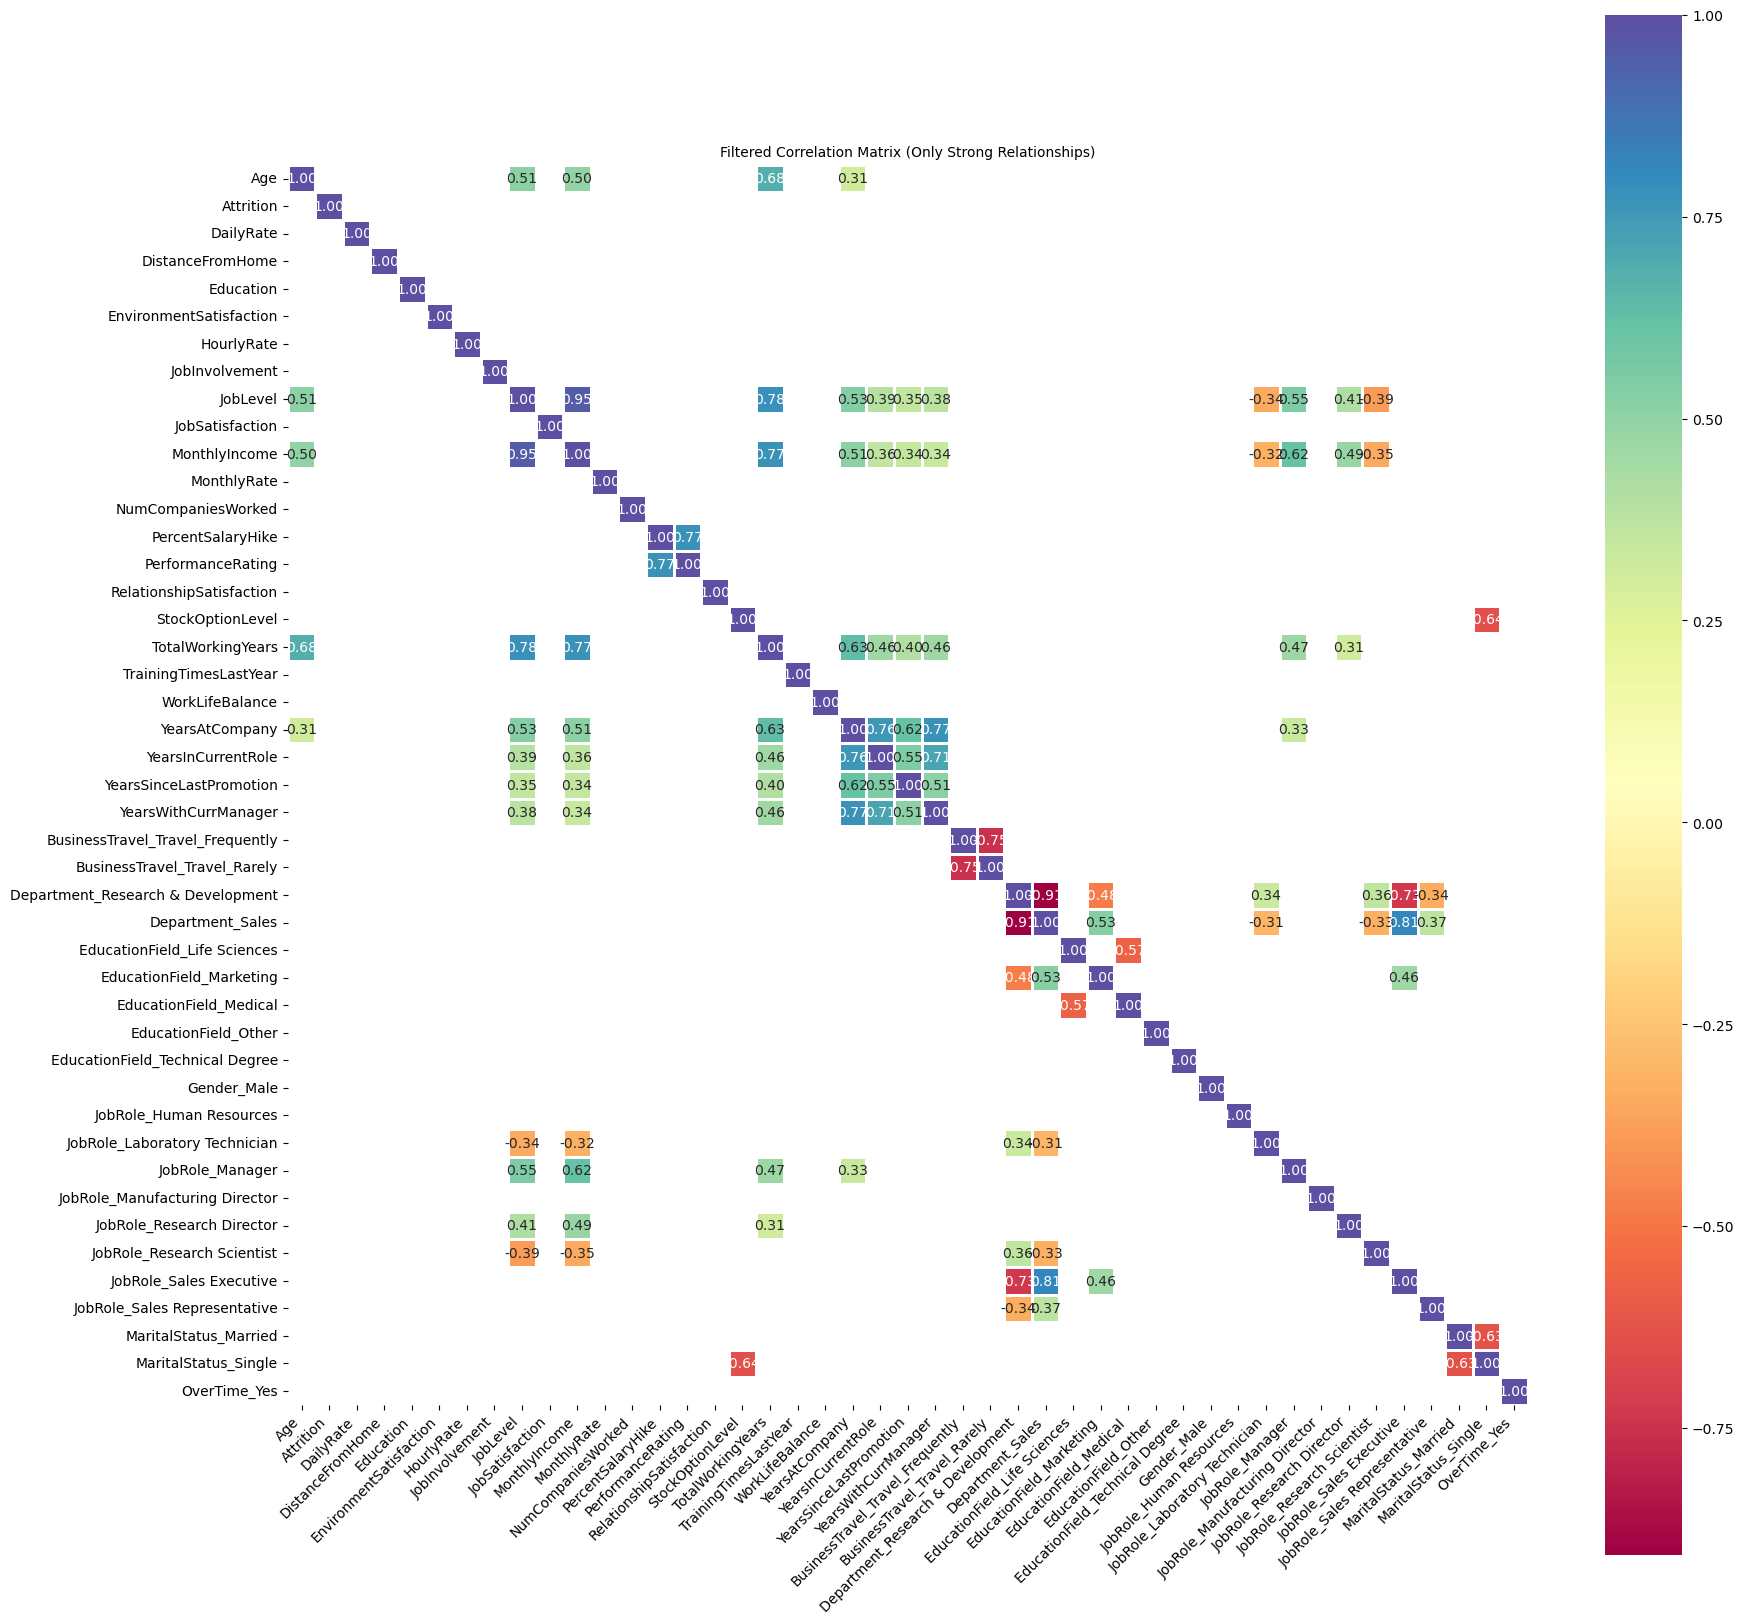

In [39]:
mask = HRcorrelation_matrix.abs() < 0.3  # Hide weak correlations
plt.figure(figsize=(20, 20))
sns.heatmap(HRcorrelation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, square=True, mask=mask)
plt.title("Filtered Correlation Matrix (Only Strong Relationships)", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [40]:
#Create x and y variables
x = HRdf_encoded.drop('Attrition', axis=1).to_numpy()
Y = HRdf_encoded['Attrition'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.linear_model import LogisticRegression

In [41]:
### Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create x and y variables
x = HRdf_encoded.drop('Attrition', axis=1).to_numpy()
y = HRdf_encoded['Attrition'].to_numpy()

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#Script for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
logisticregression_model = LogisticRegression(max_iter=10000)
logisticregression_model.fit(X_train, y_train)

# Make predictions
logisticregression_predictions = logisticregression_model.predict(X_test)

# Generate the classification report and confusion matrix
logisticregression_report = classification_report(y_test, logisticregression_predictions)
logisticregression_confusion_matrix = confusion_matrix(y_test, logisticregression_predictions)

# Print the results
print("Logistic Regression Confusion Matrix:\n", logisticregression_confusion_matrix)
print("Logistic Regression Report:\n", logisticregression_report)



Logistic Regression Confusion Matrix:
 [[235  12]
 [ 22  25]]
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.68      0.53      0.60        47

    accuracy                           0.88       294
   macro avg       0.80      0.74      0.76       294
weighted avg       0.88      0.88      0.88       294



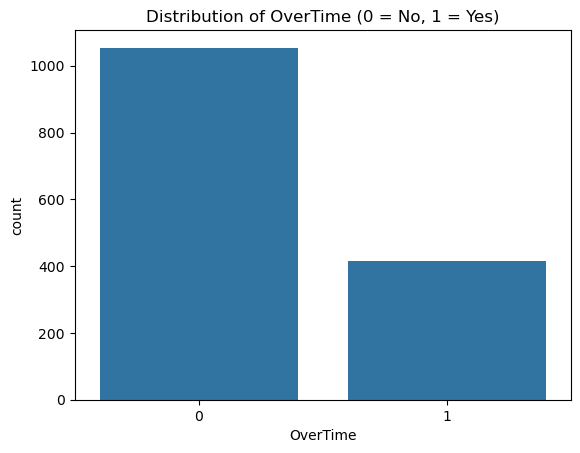

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=HRdf["OverTime"])
plt.title("Distribution of OverTime (0 = No, 1 = Yes)")
plt.show()


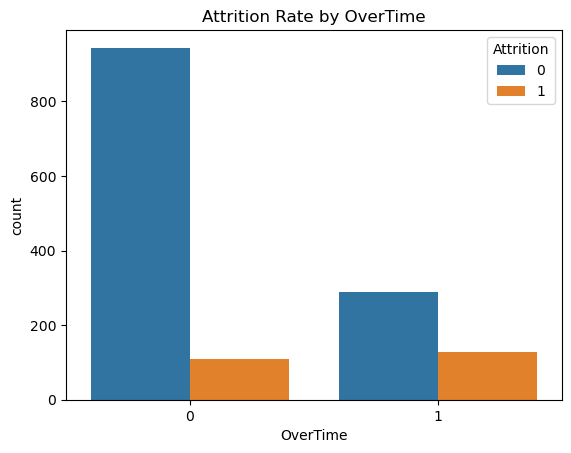

In [44]:
sns.countplot(x="OverTime", hue="Attrition", data=HRdf)
plt.title("Attrition Rate by OverTime")
plt.show()

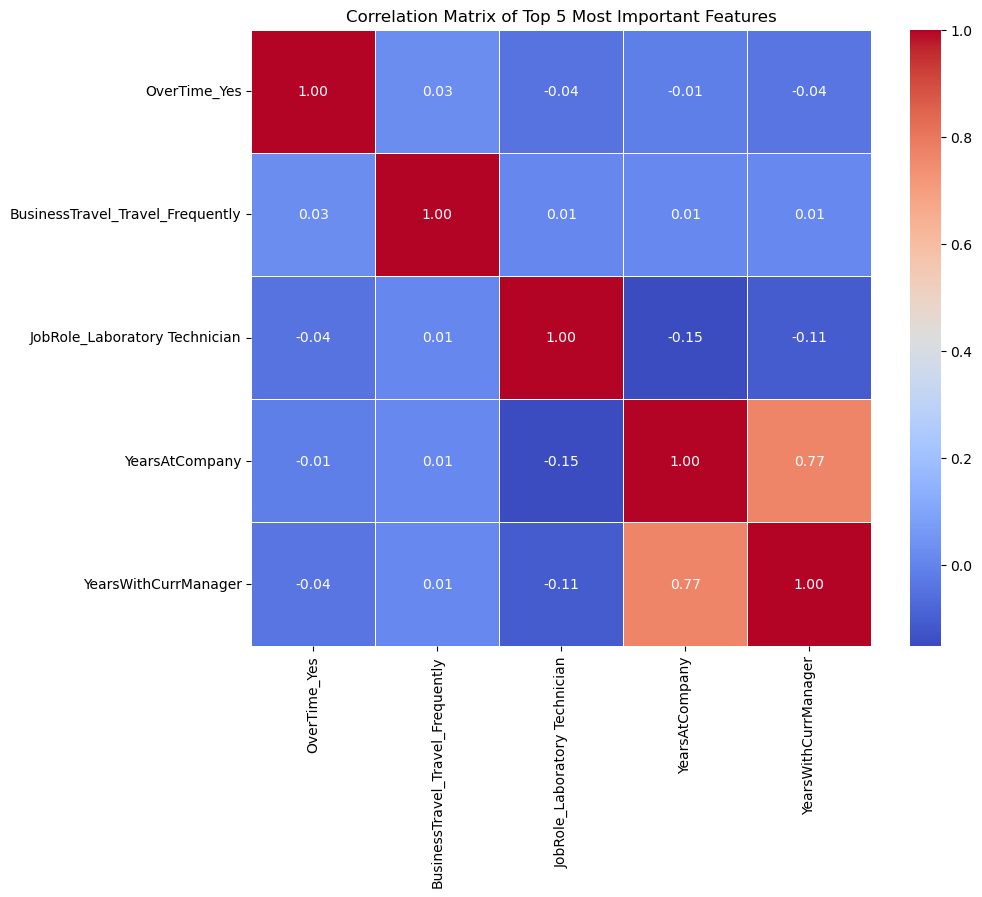

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the top 5 most important features
top_features = ['OverTime_Yes', 'BusinessTravel_Travel_Frequently', 
                'JobRole_Laboratory Technician', 'YearsAtCompany', 
                'YearsWithCurrManager']

# Compute the correlation matrix
correlation_matrix = HRdf_encoded[top_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Top 5 Most Important Features")
plt.show()


In [44]:
import pandas as pd


# Count the occurrences of each attrition value
attrition_counts = HRdf_encoded['Attrition'].value_counts()

# Display the counts
print(attrition_counts)

Attrition
0    1233
1     237
Name: count, dtype: int64
